<a href="https://colab.research.google.com/github/akalinow/Modern_Particle_Physics_Experiments/blob/2022_2023/13_Machine_learning/mlhep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo methods - part I 

## Setup the environment

In [73]:
#Color printing
from termcolor import colored

#General data operations library
import math
import numpy as np
import pandas as pd

#HEP specific tools
import scipy.constants as scipy_constants
from particle import Particle

#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

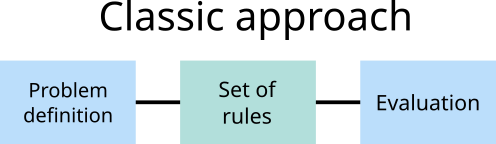

In classic approach we know our task is to distinguish particles produced in an experiment. We start thinking how can we do this, eg. what particles will we observed, maybe we can calculate their masses or charges from the values we can reconstruct from our data, how can we obtain physical parameters from our data. So from our understanding of the problem we prepare a very concrete set of rules, ussually called "selection cuts".

# What is machine learning (ML)?

*\[Machine learning is a\] field of study that gives computers the ability to learn without being explicitly programmed.*

Arthur Samuel, **1959**

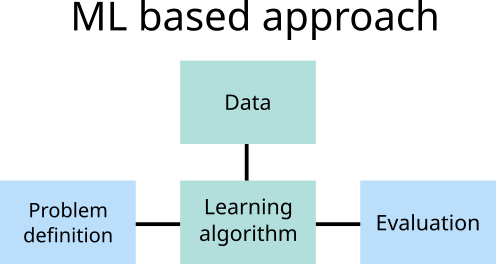

In machine learning based approach instead of constructing a set of rules we will use the data we have to train a model. We don't have to know exactly which physical values we need to construct, if the information is in our data we will let the model learn how to extract it efficiently. This doesn't mean we don't have to understand our problem! If we know that some variables will be useful we can calculate and add them to the dataset to make our model more efficient.

Surprisingly the choice of a specific model is a secondary problem. Most of time the data is more crucial that the model itself. Usually with very good dataset you can achieve good results even with poorly chosen model, but even with the best model we will not score high if the data is garbage.

<img src="https://www.smbc-comics.com/comics/1538492931-20181002.png" alt="https://www.smbc-comics.com/comics/1538492931-20181002.png" width="600"/>

### Machine learning in HEP

- **Analysis:**
    - classifying signal and background,
    - reconstructing heavy particles and improving energy resolution.
- **Event reconstruction:**
    - track reconstruction,
    - particle identification.
- **Trigger:**
    - quick final state estimation.
- **Simulation:**
    - generating realistic electronic effects,
    - faster than Monte Carlo event generation.
- **Detector control (called slow control):**
    - early fault state prediction.
- **Computing:**
    - estimating dataset popularity, determining needed number of replicas.

### What about the deep learning?

Deep learning is a specialized form of machine learning, using neural networks (NN) to deliver answers. In recent years deep learning proved to be extremely powerful and gained enormous recognition.

Today we won't delve into details of our models and as such we will stick to 'classic' machine learning algorithms (sorry no, even shallow, NN today).

## Techniques

Types of machine learning:
- supervised learning,
- unsupervised learning,
- reinforced learning.

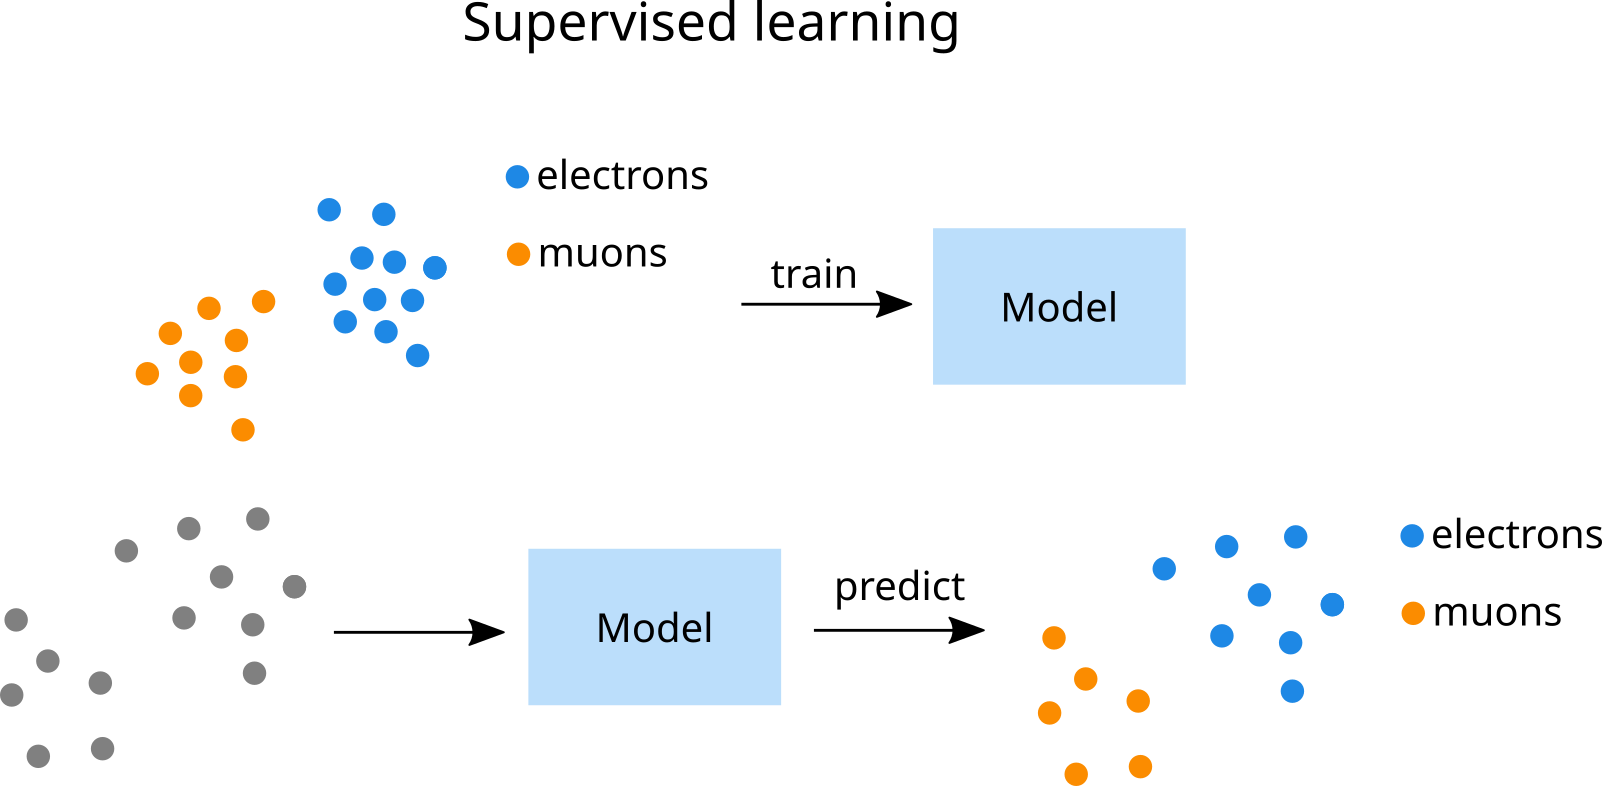

Supervised learning uses labeled datasets to train algorithms for classifying data or predicting outcomes accurately. As input data is fed into the model, it adjusts its weights until the model has been fitted appropriately.

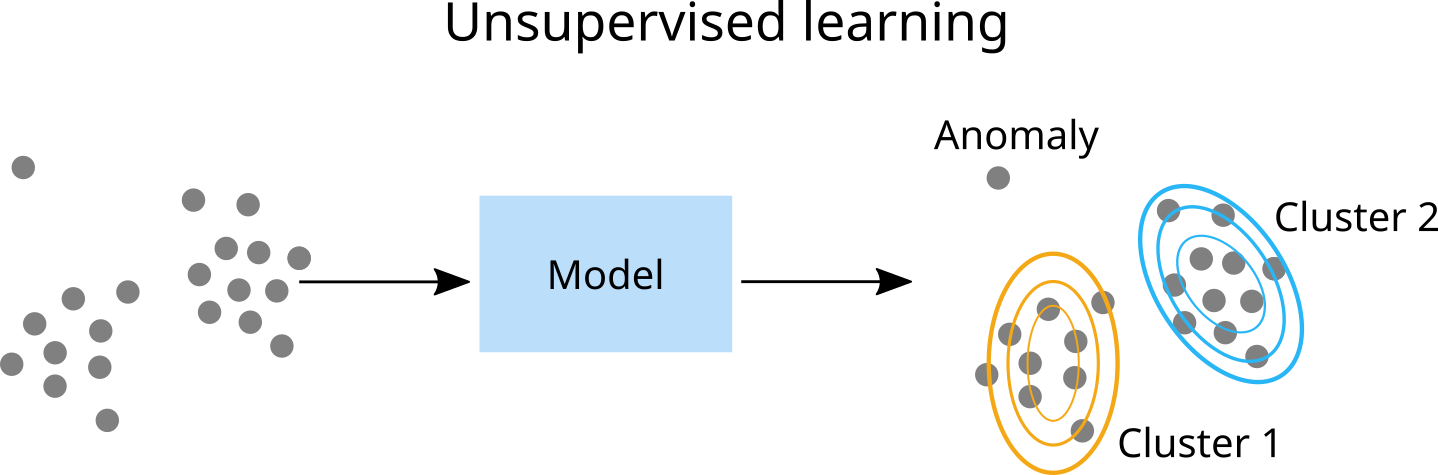

Unsupervised learning uses machine learning algorithms to discover patterns hidden in unlabeled datasets. The algorithms are able to analyze and find clusters or anomalies without the need for any input from experts.

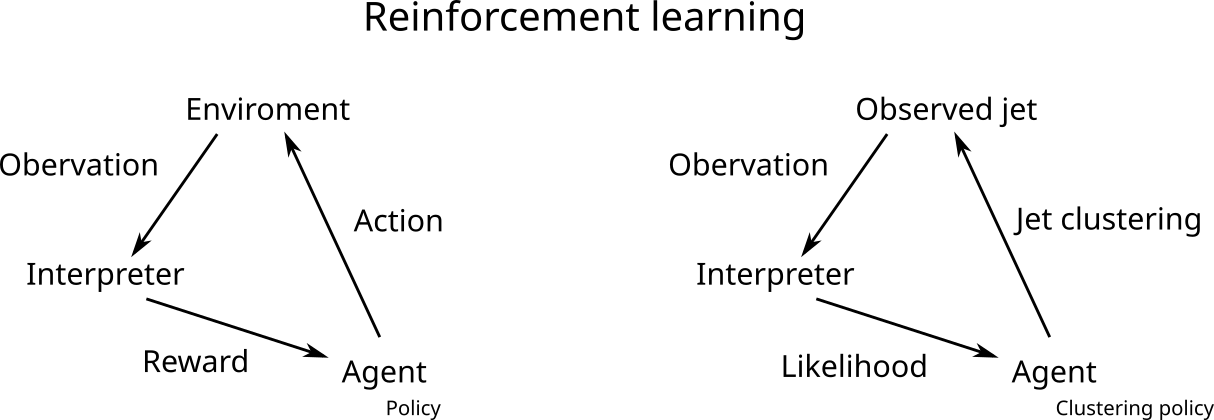

In reinforcement machine learning the algorithm isn’t trained using sample data, instead it learns by trial and error. A sequence of successful outcomes will be reinforced to develop the best recommendation or policy for a given problem.

🤔 To which category belongs our problem?

🙋 

Categories of problems in supervised learning:
- **classification** - samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. 
- **regression** - if the desired output consists of one or more continuous variables, then the task is called regression.

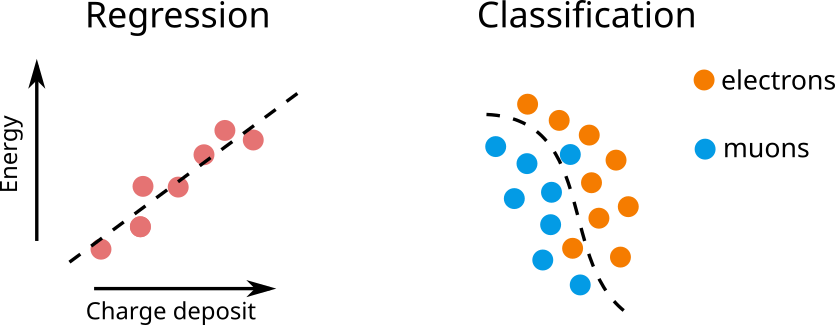

🤔 Is our problem a regression or classification?

🙋

### Types of classification:

- binary classification,
- multiclass classification,
- multilabel classification

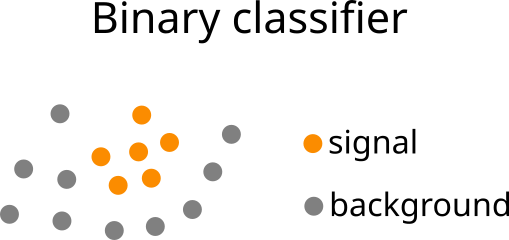

Samples belong to either one of two classes usually called `True` and `False` or `background` and `signal`.

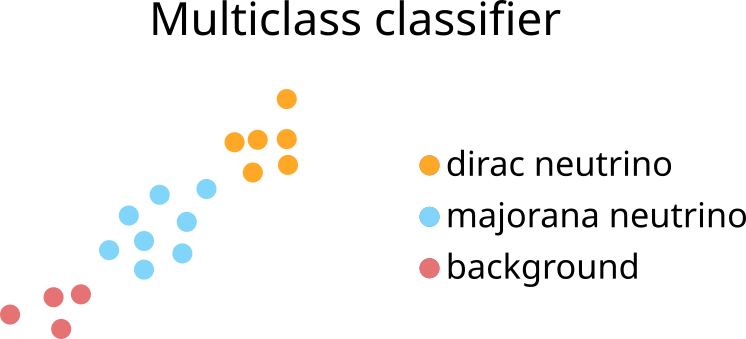

Samples belong to either one of three or more classes. Some algorithms can be naturally extended to multiclass problems otherwise a multiclass classifier can be built from multiple binary classifiers (one-vs-rest or one-vs-one variants).

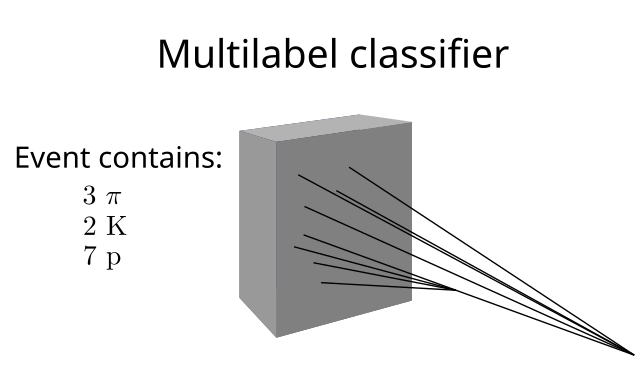

Samples belong to any number of two or more classes. Again, some algorithms can be adapted for multilabel classification otherwise the problem can be transformed to multiple  binary or multiclass problems.

In machine learning the variables from which we will make the predictions are called **features**. The variables we wish to predict are called **targets** or **labels**

$$
\huge{
\hat{\textbf{y}} = h(\textbf{X})
}
$$
$\textbf{X}$ - vector of features,

$\hat{\textbf{y}}$ - vector of predicted values

$\textbf{y}$ - vector of targets (numerical values in regression, labels in classification)

$h$ - hypothesis function


The algorithm learns through minimalizing a loss function:

$$
\huge{
L(\textbf{y}, \hat{\textbf{y}})
}
$$

The minimalization is achieved by changing parameters or inner state of hypothesis function

The precise formulas for loss function, minimalization algorithm and hypothesis function depend on the problem and machine learning algorithm.


# Classification example

[Dataset from the ATLAS Higgs Boson Machine Learning Challenge 2014](https://opendata.cern.ch/record/328)

The dataset has been built from official ATLAS full-detector simulation of $pp$ collisions and contains a mixture of events:
- $H \rightarrow \tau\tau$, $\leftarrow$ signal
- $Z \rightarrow \tau\tau$, 
- $Z \rightarrow tt$
- $W \rightarrow e\tau$ or $\mu\tau$.

Each every event following variables are provided:
- **DER_mass_MMC** -	The estimated mass of the Higgs boson candidate, obtained through a probabilistic phase space integration.
- **DER_mass_transverse_met_lep** -	The transverse mass between the missing transverse energy and the lepton.
- **DER_mass_vis** -	The invariant mass of the hadronic tau and the lepton.
- **DER_pt_h** -	The modulus of the vector sum of the transverse momentum of the hadronic tau, the lepton and the missing transverse energy vector.
- **DER_deltaeta_jet_jet** -	The absolute value of the pseudorapidity separation between the two jets (undefined if PRI_jet_num ≤1).
- **DER_mass_jet_jet** -	The invariant mass of the two jets (undefined if PRI_jet_num ≤1).
- **DER_prodeta_jet_jet** -	The product of the pseudorapidities of the two jets (undefined if PRI_jet_num ≤1).
- **DER_deltar_tau_lep** -	The R separation between the hadronic tau and the lepton.
- **DER_pt_tot** -	The modulus of the vector sum of the missing transverse momenta and the transverse momenta of the hadronic tau, the lepton, the leading jet (if PRI_jet_num ≥1) and the subleading jet (if PRI jet num = 2) (but not of any additional jets).
- **DER_sum_pt** -	The sum of the moduli of the transverse momenta of the hadronic tau, the lepton, the leading jet (if PRI jet num ≥1) and the subleading jet (if PRI jet num = 2) and the other jets (if PRI jet num = 3).
- **DER_pt_ratio_lep_tau** -	The ratio of the transverse momenta of the lepton and the hadronic tau.
- **DER_met_phi_centrality** -	The centrality of the azimuthal angle of the missing transverse energy vector w.r.t. the hadronic tau and the lepton.
- **DER_lep_eta_centrality** - The centrality of the pseudorapidity of the lepton w.r.t. the two jets (undefined if PRI_jet_num ≤1).
- **PRI_tau_pt** -	The transverse momentum $\sqrt{p^{2}_{x}+p^{2}_{y}}$ of the hadronic tau.
- **PRI_tau_eta** -	The pseudorapidity η of the hadronic tau.
- **PRI_tau_phi** -	The azimuth angle ϕ of the hadronic tau.
- **PRI_lep_pt** 	- The transverse momentum $\sqrt{p^{2}_{x}+p^{2}_{y}}$ of the lepton (electron or muon).
- **PRI_lep_eta** -	The pseudorapidity η of the lepton.
- **PRI_lep_phi** -	The azimuth angle ϕ of the lepton.
- **PRI_met** -	The missing transverse energy $\vec{E}^{miss}_{T}$
- **PRI_met_phi** -	The azimuth angle ϕ of the mssing transverse energy
- **PRI_met_sumet** -	The total transverse energy in the detector.
- **PRI_jet_num** -	The number of jets (integer with value of 0, 1, 2 or 3; possible larger values have been capped at 3).
- **PRI_jet_leading_pt** -	The transverse momentum $\sqrt{p^{2}_{x}+p^{2}_{y}}$ of the leading jet, that is the jet with largest transverse momentum (undefined if PRI_jet_num = 0).
- **PRI_jet_leading_eta** -	The pseudorapidity η of the leading jet (undefined if PRI jet num = 0).
- **PRI_jet_leading_phi** -	The azimuth angle ϕ of the leading jet (undefined if PRI jet num = 0).
- **PRI_jet_subleading_pt** -	The transverse momentum $\sqrt{p^{2}_{x}+p^{2}_{y}}$ of the leading jet, that is, the jet with second largest transverse momentum (undefined if PRI_jet_num ≤1).
- **PRI_jet_subleading_eta** -	The pseudorapidity η of the subleading jet (undefined if PRI_jet_num ≤ 1).
- **PRI_jet_subleading_phi** -	The azimuth angle ϕ of the subleading jet (undefined if PRI_jet_num ≤ 1).
- **PRI_jet_all_pt** - 	The scalar sum of the transverse momentum of all the jets of the events.
- **Weight** 	- The event weight
- **Label** -	The event label (string) ∈ {s,b} (s for signal, b for background).
- **KaggleSet** -	String specifying to which Kaggle set the event belongs : ”t”:training, ”b”:public leaderboard, ”v”:private leaderboard,”u”:unused.
- **KaggleWeigh**t -	Weight normalised within each Kaggle dataset.

**Our task is to build a classifier that will be able to select the $H \rightarrow \tau\tau$ events from the background.**

First we need to download the dataset. Like many other datasets from CERN our dataset is hosted on [opendata.cern.ch](https://open.data.cern.ch).

Now, we need to load the dataset and check what's inside.

To represent our data inside the code we will use the `pandas` library. `pandas` is built on top of `numpy` and is very convenient for data analysis and manipulation. For us the most interesting part of the library will be `pandas.Dataframe`. Dataframes are extremely popular data structure that models data as 2D  table (like spreadsheet) with columns (variables) and rows (entries). 

Teaching `pandas` is not in the scope of this notebook. Most methods should be more or less understandable or explained in the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)

FYI current versions of `ROOT` have `ROOT.RDataFrame` which is more modern dataframe interface for classic `ROOT.Tree` and other formats. Check [manual](https://root.cern/manual/data_frame/) 😉.

In [4]:
filePath = 'https://opendata.cern.ch/record/328/files/atlas-higgs-challenge-2014-v2.csv.gz'
filePath = 'https://akalinow.web.cern.ch/akalinow/HiggsBoson_ML_challenge/training.csv'

df = pd.read_csv(filePath)

Print information about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

Print a list of column names in dataset.

In [6]:
df.columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

After a quick look we don't see any missing values in the dataset, but let's drop them just in case

In [7]:
df.dropna(inplace = True)

Let's check what is the mysterious `object` in `Label` column.

In [8]:
df['Label']

0         s
1         b
2         b
3         b
4         b
         ..
249995    b
249996    b
249997    s
249998    b
249999    b
Name: Label, Length: 250000, dtype: object

The algorithm we will use requires numerical values not strings. We need to encode the classes.
It is a bit more convenient ot use int instead of bool type.

In [9]:
df['Label'] = df['Label']=='s'
df['Label'] = df['Label'].astype(int)
df['Label']

0         1
1         0
2         0
3         0
4         0
         ..
249995    0
249996    0
249997    1
249998    0
249999    0
Name: Label, Length: 250000, dtype: int64

Let's remove columns we won't use

In [10]:
df.drop(columns = ['Weight', 'EventId'], inplace = True)

Now we should be left only with interesting data. Let's take another look

In [11]:
df.head(5).T

,0,1,2,3,4
DER_mass_MMC,138.470,160.937,-999.000,143.905,175.864
DER_mass_transverse_met_lep,51.655,68.768,162.172,81.417,16.915
DER_mass_vis,97.827,103.235,125.953,80.943,134.805
DER_pt_h,27.980,48.146,35.635,0.414,16.405
DER_deltaeta_jet_jet,0.910,-999.000,-999.000,-999.000,-999.000
DER_mass_jet_jet,124.711,-999.000,-999.000,-999.000,-999.000
DER_prodeta_jet_jet,2.666,-999.000,-999.000,-999.000,-999.000
DER_deltar_tau_lep,3.064,3.473,3.148,3.310,3.891
DER_pt_tot,41.928,2.078,9.336,0.414,16.405
DER_sum_pt,197.760,125.157,197.814,75.968,57.983


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
DER_mass_MMC,250000.0,-49.023079,406.345647,-999.000,78.10075,105.0120,130.60625,1192.026
DER_mass_transverse_met_lep,250000.0,49.239819,35.344886,0.000,19.24100,46.5240,73.59800,690.075
DER_mass_vis,250000.0,81.181982,40.828691,6.329,59.38875,73.7520,92.25900,1349.351
DER_pt_h,250000.0,57.895962,63.655682,0.000,14.06875,38.4675,79.16900,2834.999
DER_deltaeta_jet_jet,250000.0,-708.420675,454.480565,-999.000,-999.00000,-999.0000,0.49000,8.503
DER_mass_jet_jet,250000.0,-601.237051,657.972302,-999.000,-999.00000,-999.0000,83.44600,4974.979
DER_prodeta_jet_jet,250000.0,-709.356603,453.019877,-999.000,-999.00000,-999.0000,-4.59300,16.690
DER_deltar_tau_lep,250000.0,2.373100,0.782911,0.208,1.81000,2.4915,2.96100,5.684
DER_pt_tot,250000.0,18.917332,22.273494,0.000,2.84100,12.3155,27.59100,2834.999
DER_sum_pt,250000.0,158.432217,115.706115,46.104,77.55000,120.6645,200.47825,1852.462


Histogram of all the variables present in the dataset (a plot is worth 1000 words).

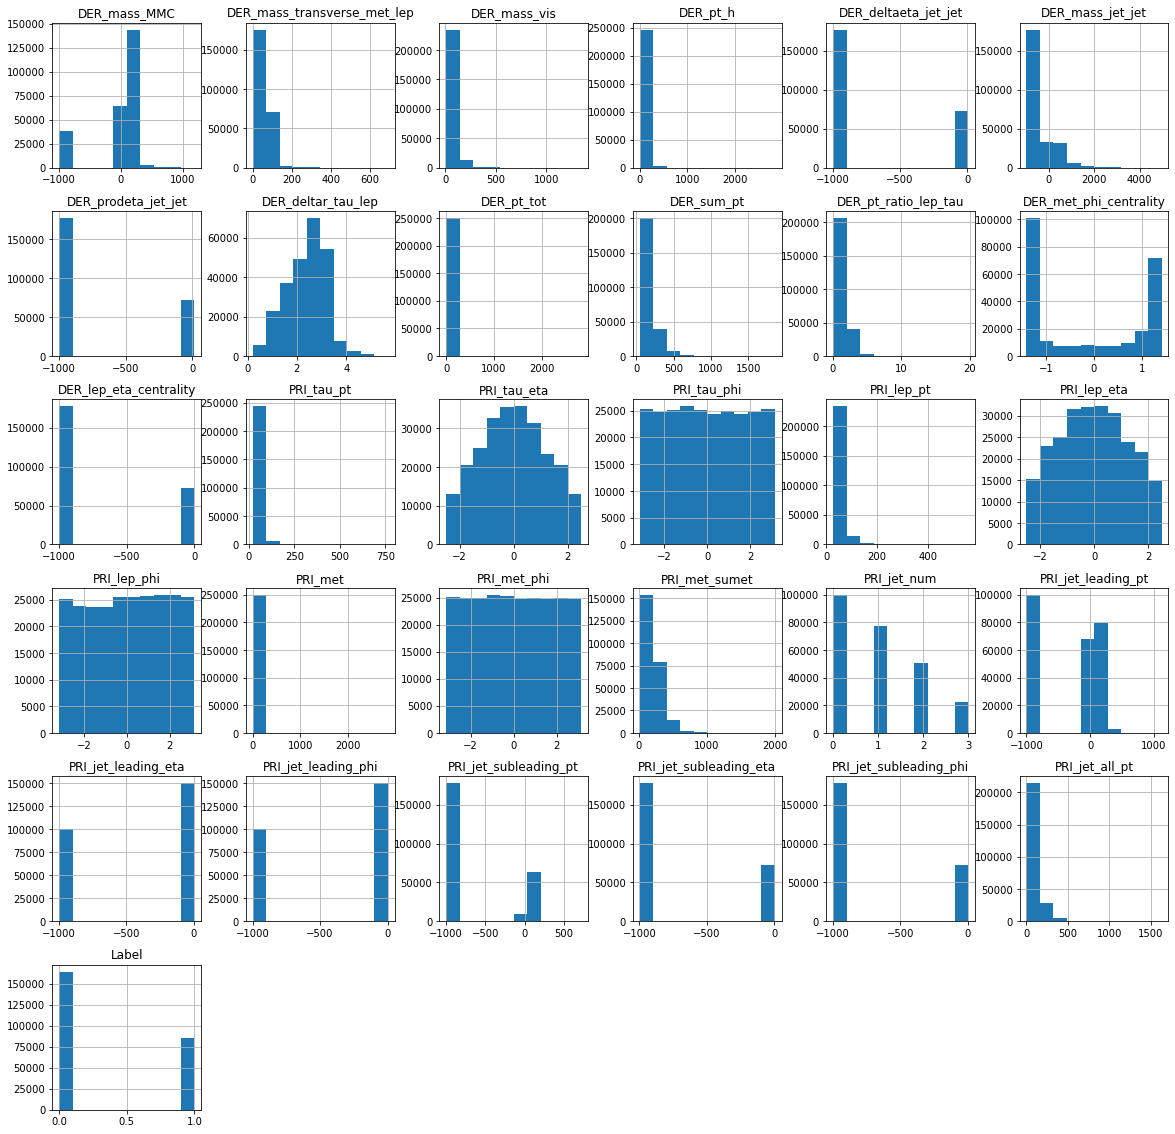

In [13]:
df.hist(figsize=(20,20));

Since our problem is classifying the event it may be worth to plot the distribution splitted by classes.

To do this we will use yet another library you may not know. `seaborn` is a popular plotting library built on top of `matplotlib` that plays very nicely with `pandas`. Check the [documentation](https://seaborn.pydata.org/introduction.html) if you are interested.

Our data set is quite big. It will be faster to make calculations and plots for smaller sample

In [14]:
df1=df.sample(n=10000, random_state=1)

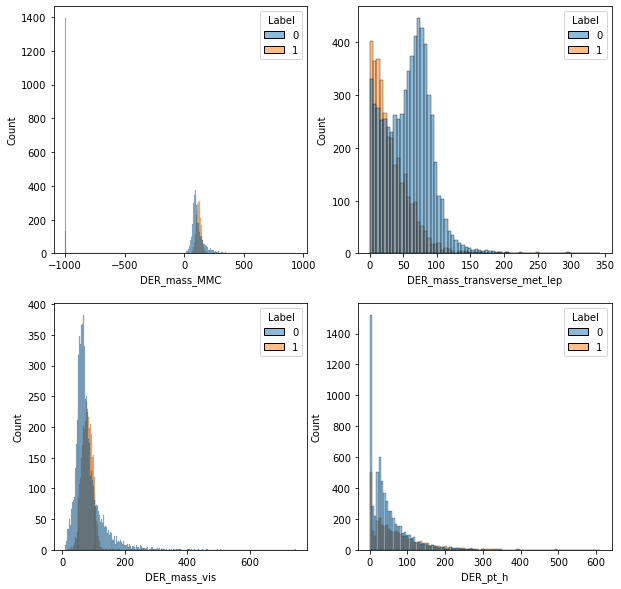

In [41]:
columns = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis','DER_pt_h']
    
fig, axes = plt.subplots(2,2, figsize=(10,10))

for item in enumerate(axes.flatten()):
    index = item[0]
    axis = item[1]
    sns.histplot(data=df1, x=columns[index], hue='Label', ax=axis);

**Please:**

* improve the plots visibilty by adjusting the axes limits
* make a 3x3 plot with nine variables


**Hint:** you can set the limits by hand, or using some quantile of the variable distribution:
```Python
minX = df1[columns[index]].quantile(0.05)
maxX = df1[columns[index]].quantile(0.95)
```

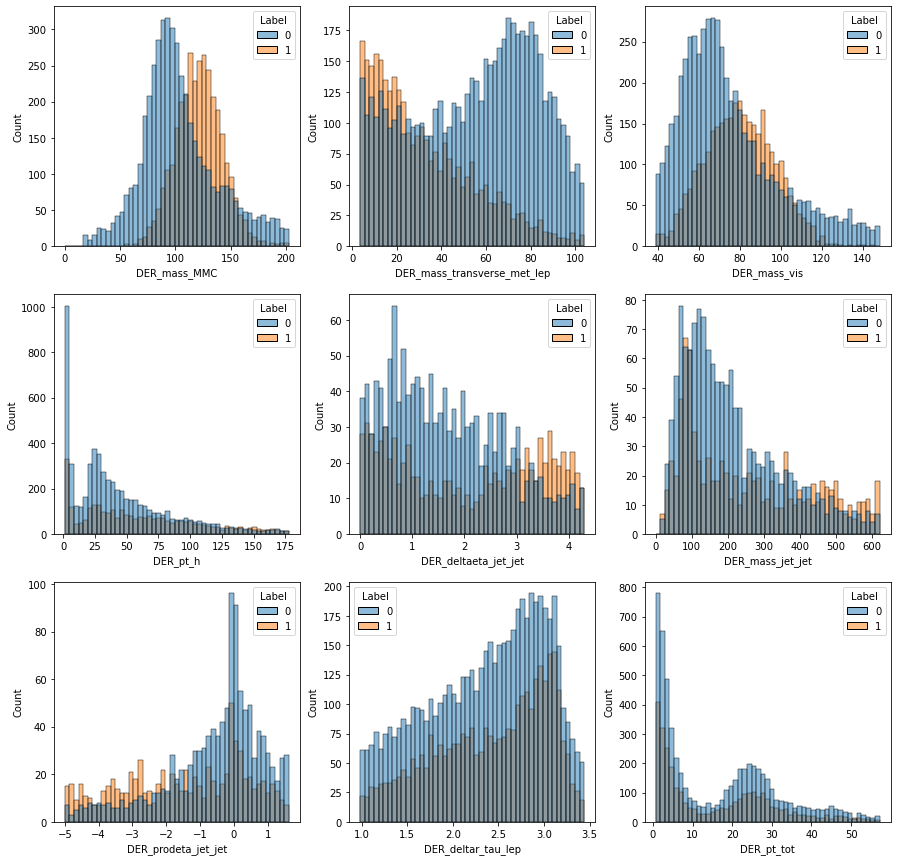

In [48]:
##BEGIN_SOLUTION

columns = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h',
           'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet','DER_deltar_tau_lep', 
           'DER_pt_tot']

fig, axes = plt.subplots(3,3, figsize=(15,15))

for item in enumerate(axes.flatten()):
    index = item[0]
    axis = item[1]
    minX = df1[columns[index]].quantile(0.05)
    maxX = df1[columns[index]].quantile(0.95)
        
    if index==0 or index==4 or index==5:
        minX=0
    elif index==6:
        minX = -5
      
    bins = np.linspace(minX,maxX, 50)
    sns.histplot(data=df1, x=columns[index], hue='Label', bins=bins, ax=axis);

##END_SOLUTION
pass

We've explored our dataset and learned a bit. Now is the time to prepare to train our algorithm.

Since we will be doing supervised learning with a labeled dataset the idea is to split it into two subsets:
- **train subset** - used for training our model, 
- **test subset** - used for evaluating our model.

By keeping the test subset separated, we can use it to estimate how the model will behave on real data (unlabeled). We will use methods from sklearn library to split the data into given proportions.

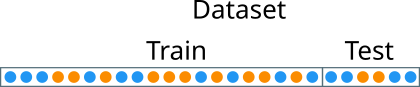

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1.drop(columns = 'Label'), df1['Label'], test_size = 0.2, random_state=42)
print(colored('X train size:\t', 'blue'), X_train.shape)
print(colored('y train size:\t', 'blue'), y_train.shape)
print(colored('X test size:\t',  'blue'), X_test.shape)
print(colored('y test size:\t', 'blue'), y_test.shape)

X train size:	 (8000, 30)
y train size:	 (8000,)
X test size:	 (2000, 30)
y test size:	 (2000,)


On previous plots we've noticed that the variables can have different order of magnitudes. For our algorithm it'd be best if every variable was of the same order. To achieve this we need to rescale them

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

print("Before scaling")
print(colored("Features means:\n",'blue'), X_train.mean(axis=0))
print(colored("Features variances:\n",'blue'), X_train.var(axis=0))

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("After scaling")
print(colored("Features means:\n",'blue'), X_train.mean(axis=0))
print(colored("Features variances:\n",'blue'), X_train.var(axis=0))

Before scaling
Features means:
 DER_mass_MMC                   -48.018583
DER_mass_transverse_met_lep     49.396190
DER_mass_vis                    81.216121
DER_pt_h                        57.411481
DER_deltaeta_jet_jet          -717.849688
DER_mass_jet_jet              -612.885118
DER_prodeta_jet_jet           -718.776327
DER_deltar_tau_lep               2.372897
DER_pt_tot                      19.091338
DER_sum_pt                     157.647725
DER_pt_ratio_lep_tau             1.441689
DER_met_phi_centrality          -0.131110
DER_lep_eta_centrality        -718.399239
PRI_tau_pt                      39.009981
PRI_tau_eta                     -0.018715
PRI_tau_phi                     -0.003945
PRI_lep_pt                      46.833555
PRI_lep_eta                     -0.022549
PRI_lep_phi                      0.043131
PRI_met                         41.128478
PRI_met_phi                     -0.049895
PRI_met_sumet                  209.135469
PRI_jet_num                      0.960625
PR

### Training

Now that our dataset has been preprocessed we can finally start training our model. We will use a Logistic regression for the beggining.


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

It's done! Now we can check our model in action

In [ ]:
y_pred = model.predict(X_train[:5])
print(y_pred)
print(y_train[:5].values)

Our model made a few mistakes. We need to somehow evaluate it's results and looking at every event is not an option.

Let's introduce accuracy metric:

$\text{Accuracy}=\frac{\text{Number of correct predictions}}{\text{Total number 
of predictions}}$

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = model.predict(X_train)
acc= accuracy_score(y_train, y_pred)
print('train set: accuracy score', acc)

So we calculated the accuracy of our model on the data in was trained. But the real use of our model is making prediction on unknown (unlabeled) data. We can estimated this by calculating our metric on test dataset

In [ ]:
y_pred = model.predict(X_test)
acc= accuracy_score(y_test, y_pred)
print('test set: accuracy score', acc)

Is this good? Is accuracy a good metric?
Let's check what would be the result for a classifier that classifies everything as background (useless for finding signal).

In [ ]:
y_bg = np.zeros_like(y_test)
acc= accuracy_score(y_test, y_bg)
print('test set: accuracy score', acc)


Our classifier is a bit better than this useless all-background classifier, but we see that accuracy is not the best metric for everything.

Also there are different types of mistakes. All-background classifier never mistakes background for signal, but always mistakes signal for background.

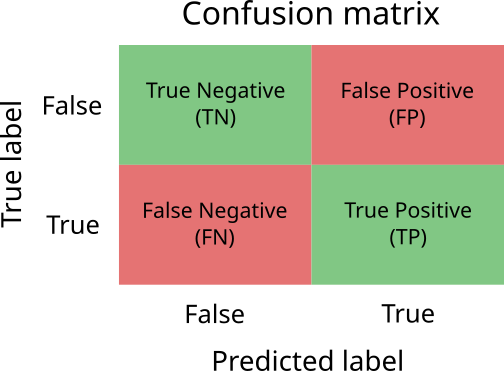

If we were classifying patients with cancer, we might consider completely different type of error prescribing unnecessary medical check for healthy patient (FP) or sending home a patient with operational cancer (FN).

🤔 If we classify a $Z\rightarrow \tau\tau$ event as a $H \rightarrow \tau\tau$, it's obviously a mistake. But is it FP or FN?




🙋 

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

🤔 How would a confusion matrix for all-background classifier look like? How would it look like for a coin-flip classifier?


🙋 

Having the confusion matrix we can rewrite accuracy in its terms:

$\text{Accuracy} = \frac{\text{TP}+\text{TN}}{\text{TP}+\text{TN}+\text{FP}+\text{FN}}$

We can also introduce more metrics:

$\text{Precision} = \frac{\text{TP}}{\text{TP}+\text{FP}}$

$\text{Recall} = \frac{\text{TP}}{\text{TP}+\text{FN}}$

- Precision, positive predictive value (PPV) - How many retrieved events are relevant?
- Recall, sensitivity, true positive rate (TPR) - How many relevant events are retrieved?

We can construct many more metrics such asmiss rate, fall-out, false discovery rate, etc.

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
acc= accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f'accuracy: {acc:0.2f}')
print(f'precision: {precision:0.2f}')
print(f'recall: {recall:0.2f}')

Let's check if using this metric we can prove the superiority of our classifier over the all-background classifier

In [ ]:
acc= accuracy_score(y_test, y_bg)
precision = precision_score(y_test, y_bg)
recall = recall_score(y_test, y_bg)
print(all)
print(f'accuracy: {acc:0.2f}')
print(f'precision: {precision:0.2f}')
print(f'recall: {recall:0.2f}')

Another thing worth noticing is that our model can not only predict classes but also return probabilities of belonging to those classes

In [ ]:
y_prob = model.predict_proba(X_test)[:,1]
print('Probabilities:\n',y_prob)
print('Classes:\n', y_prob>0.5)

When operating with probabilities we can set different thresholds for classifications (default 50%). For instance, we can choose to classify an event as signal only when we are 90% sure 

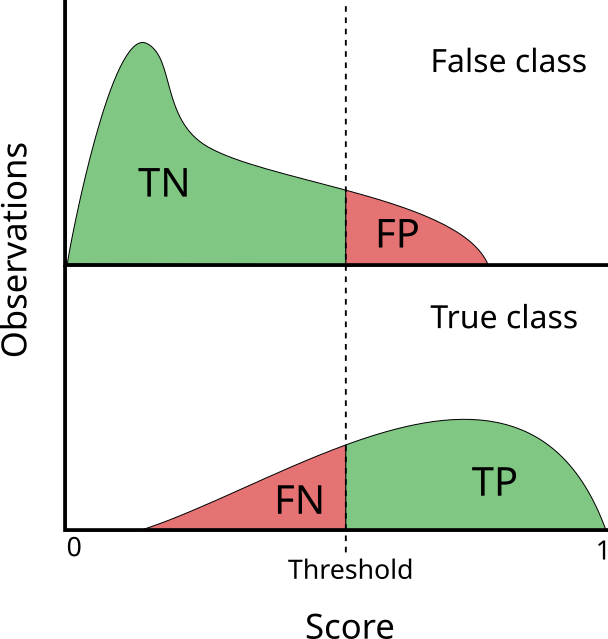

🤔 Why would we want to set higher threshold? How would it affect the precision and recall scores? 


🙋 

In [ ]:
for threshold in (0.25, 0.5, 0.75):
  print('threshold:', threshold)
  y_pred = y_prob>threshold
  print(f'\taccuracy: {accuracy_score(y_test, y_pred):0.2f}')
  print(f'\tprecision: {precision_score(y_test, y_pred):0.2f}')
  print(f'\trecall: {recall_score(y_test, y_pred):0.2f}')


We've seen that by manipulating threshold we can make precision and recall flexible. It would be interesting to have a metric that is threshold independent. Let's introduce even more metrics:

- ROC curve - receiver operating characteristic curve - parametric plot of true positive rate (recall, $\frac{\text{TP}}{\text{TP}+\text{FN}}$ ) vs false positive rate (fall-out, $\frac{\text{FP}}{\text{FP}+\text{TN}}$), where threshold is the parameter
- AUC - area under curve - integrated ROC curve

In [ ]:
from sklearn.metrics import RocCurveDisplay

In [ ]:
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='coin flip (AUC = 0.50)')
plt.title('ROC curve')
plt.legend()

🤔 Ideal classifier would make a clear distinction between true and false classes (no FP or FN cases). What would be the shape of ROC curve for such classifier?


🙋 

Since we obtained tools for evaluating models, now it's time to train a different model and compare them!

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_train)
acc= accuracy_score(y_train, y_pred)
print('train set: accuracy score', acc)

Looks like we got 100% accuracy. Our model made no mistakes. All higgses found. Problem solved.

Before we call it a day, let's just for safety check accuracy on a test set

In [ ]:
y_pred = model.predict(X_test)
acc= accuracy_score(y_test, y_pred)
print('test set: accuracy score', acc)

What happened? It's way worse than on the train set.

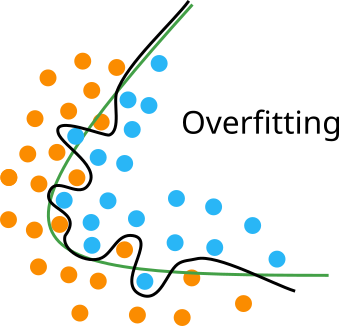

Getting much better results on a train set than on a test set is a classic example of overfitting.
Overfitting happens when the model instead of learning the general trend in our train set starts learning its detail.
An 'everyday life' example of overfiting is fitting a too high degree polynomial to data, so it starts reassembling the noise in the data.

To fight with overfitting we regularize our models by add add constrains or penalties for overly complicated models.

So far we used models with default (hyper)parameters but usually they have multiple hyperparameters to tune. The aim of this notebook is to show of general ideas rather than obtain a competitive model.

An example  regularization hyperparameter of `DecisionTreeClassifier` is `max_depth` which roughly controls how complicated our tree can be.

In [ ]:
max_depths = (20,10,2)
for max_depth in max_depths:
  print('max depth', max_depth)
  model = DecisionTreeClassifier(max_depth=max_depth)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_train)
  print(f'\ttrain set: accuracy score {accuracy_score(y_train, y_pred):0.2f}')
  y_pred = model.predict(X_test)
  print(f'\ttest set: accuracy score {accuracy_score(y_test, y_pred):0.2f}')
  print(f'\ttest set: precision score {precision_score(y_test, y_pred):0.2f}')
  print(f'\ttest set: recall score {recall_score(y_test, y_pred):0.2f}')

Actually in the example above we kind of abused the test dataset. We trained the model several times and choose the one that behave the best on the test dataset. It'd be safer to do [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html) (out of scope of this notebook) while tuning and use the test set only for final check.

We will add a more advanced model `RandomForestClassifier` to the comparison just to show how different ROC curves can look like

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_logistic = LogisticRegression()
clf_tree = DecisionTreeClassifier(max_depth=2)
clf_forest = RandomForestClassifier()
for model in (clf_logistic, clf_tree, clf_forest):
  model.fit(X_train,y_train)

graph = RocCurveDisplay.from_estimator(clf_logistic, X_test, y_test)
RocCurveDisplay.from_estimator(clf_tree, X_test, y_test, ax=graph.ax_)
RocCurveDisplay.from_estimator(clf_forest, X_test, y_test, ax=graph.ax_)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='coin flip (AUC = 0.50)')
plt.title('ROC curve')
plt.legend()

y_pred = clf_forest.predict(X_test)
print(f'accuracy: {accuracy_score(y_test, y_pred):0.2f}')
print(f'precision: {precision_score(y_test, y_pred):0.2f}')
print(f'recall: {recall_score(y_test, y_pred):0.2f}')

It can be quite surpising that the `DecisionTreeClasifier` even after some tuning is worse than the default `LogisticRegression`. To defend the `DecisionTreeClasifier` the regularizing hyperparameter we chose to touch is quite brutal for the tree, but we would need to learn a bit about decision tree classifiers to know it.

The usual workflow is:
- explore and pre-process the dataset, try adding more useful features if possible, 
- train many different algorithms,
- check how they behave on our data, 
- pick a few the most promising,
- fine tune hyperparameters of the chosen few,
- compare tuned model and pick the best.

In this notebook we'll skip the tuning. Nonetheless we have obtained a model than can classify $H$ with around 80% accuracy and precision, which is quite outstanding considering that we got this result using only the data and not diving deep into the physics.

## References and materials



- [scikit-learn](https://scikit-learn.org/stable/user_guide.html) - package documentation,
- [HEP-ML-Resources](https://github.com/iml-wg/HEP-ML-Resources) - git repository with collection of links to courses, classes, slides, papers, etc. about ML in HEP,
- [openddata.cern.ch](http://opendata.cern.ch/) - datasets and resources from CERN,
- [kaggle](https://www.kaggle.com) - dataset and challenges for ML,
- [usosweb](https://usosweb.fuw.edu.pl/kontroler.php?_action=katalog2/przedmioty/pokazPrzedmiot&prz_kod=1100-3BN17&callback=g_090c7e64) - a ML course at FUW,
- Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems, Aurélien Géron - a book about ML I particulary like